In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('artifacts/artificial_sales.csv')

In [3]:
df.head()

,Day_Count,Day,StoreID,ProductName,Product_Calorie,Promo_applied,specials,mods,Amt,weather,Inflation_Percentage,Unemployment_Percentage
0,1,Tuesday,S001,VBurger,625,NaN,No,No,13125.0,cold,4.7,1.7
1,2,Wednesday,S001,VBurger,625,NaN,No,No,9000.0,hot,4.7,1.7
2,3,Thursday,S001,VBurger,625,NaN,No,No,11000.0,cold,4.7,1.7
3,4,Friday,S001,VBurger,625,NaN,No,No,13750.0,hot,4.7,1.7
4,5,Saturday,S001,VBurger,625,1,No,No,13612.5,hot,4.7,1.7


In [4]:
df.describe()

,Day_Count,Product_Calorie,Amt,Inflation_Percentage,Unemployment_Percentage
count,17606.000000,17606.000000,1.760500e+04,17571.000000,17606.000000
mean,545.408667,513.716063,2.242079e+05,3.568989,1.655524
std,315.268299,257.604960,8.322079e+05,1.411191,0.598976
min,1.000000,0.000000,-4.000000e+02,1.700000,1.000000
25%,272.000000,400.000000,9.000000e+03,2.800000,1.100000
50%,541.000000,625.000000,1.335000e+04,3.100000,1.440000
75%,823.000000,700.000000,2.000000e+04,4.800000,1.900000
max,1094.000000,800.000000,5.355000e+06,7.000000,3.200000


In [5]:
idx = df[df['Day'].isna()].index.tolist()

In [6]:
df.apply(lambda x: x.isna()).agg(func=pd.value_counts)

,Day_Count,Day,StoreID,ProductName,Product_Calorie,Promo_applied,specials,mods,Amt,weather,Inflation_Percentage,Unemployment_Percentage
False,17606.0,17583,17606.0,17606.0,17606.0,1411,17606.0,17606.0,17605,17606.0,17571,17606.0
True,NaN,23,NaN,NaN,NaN,16195,NaN,NaN,1,NaN,35,NaN


In [7]:
# drop Promo_applied
# drop Amt null value
# drop null Day values as very small count

In [8]:
# drop StoreID, mods, specials, Product_Calorie
# Product is important and will have to be preserved 
# mods and specials won't have any bearing as the data is way too skewed to draw meaningful conclusion
# is Inflation % necessary & Unemployed %
# check if Day is important
# many categories in Product are overlapping and can be put into one
'''
Fries                 
Coca-Cola, Coke           
Cheese Burger, Chz Burger         
Chicken Brg, Chk Burger, Chicken Burger, Chicken Br         
Falafel Burger, F Burger
Veggie Burger, V. Burger, Veg Burger, VBurger        
Extra Cheese, X-CHeese          
Carmalized Onions      


To be removed as this won't affect revenue:
Fast Please        
No Lettuce
NO TOMATOES, No Tom Plz
No Chz, Absolute no cheese
'''


"\nFries                 \nCoca-Cola, Coke           \nCheese Burger, Chz Burger         \nChicken Brg, Chk Burger, Chicken Burger, Chicken Br         \nFalafel Burger, F Burger\nVeggie Burger, V. Burger, Veg Burger, VBurger        \nExtra Cheese, X-CHeese          \nCarmalized Onions      \n\n\nTo be removed as this won't affect revenue:\nFast Please        \nNo Lettuce\nNO TOMATOES, No Tom Plz\nNo Chz, Absolute no cheese\n"

In [9]:
df.columns

Index(['Day_Count', 'Day', 'StoreID', 'ProductName', 'Product_Calorie',
       'Promo_applied', 'specials', 'mods', 'Amt', 'weather',
       'Inflation_Percentage', 'Unemployment_Percentage'],
      dtype='object')

In [10]:
df = df[['Day_Count', 'Day', 'StoreID', 'ProductName', 'Product_Calorie',
         'specials', 'mods', 'weather', 'Inflation_Percentage', 'Unemployment_Percentage', 'Amt']]

df.dropna(subset='Amt', inplace=True)

In [11]:
df.drop(labels=df[df['Day']=='6'].index, inplace=True)
'''
To be removed as this won't affect revenue and only about 40 datapoints:
Fast Please        
No Lettuce
NO TOMATOES, No Tom Plz
No Chz, Absolute no cheese
'''
df.dropna(subset='Day', inplace=True)
df.drop(labels=df[(df['ProductName']=='Fast Please') | (df['ProductName']=='No Lettuce') | (df['ProductName']=='NO TOMATOES') | (df['ProductName']=='No Tom Plz') | (df['ProductName']=='No Chz') | (df['ProductName']=='Absolute no cheese')].index, inplace=True)

In [12]:
df['mods'].replace(to_replace='Y', value='Yes', inplace=True)

df['specials'].replace(to_replace='Y', value='Yes', inplace=True)
df['specials'].replace(to_replace='nO', value='No', inplace=True)
df['specials'].replace(to_replace='N', value='No', inplace=True)

In [13]:
df['ProductName'].replace(to_replace=['Coca-Cola', 'Coke'], value='Coca-Cola', inplace=True)
df['ProductName'].replace(to_replace=['Cheese Burger', 'Chz Burger'], value='Cheese Burger', inplace=True)
df['ProductName'].replace(to_replace=['Extra Cheese', 'X-CHeese'], value='Extra Cheese', inplace=True)
df['ProductName'].replace(to_replace=['Chicken Brg', 'Chk Burger', 'Chicken Burger', 'Chicken Br'], value='Chicken Burger', inplace=True)
df['ProductName'].replace(to_replace=['Falafel Burger', 'F Burger'], value='Falafel Burger', inplace=True)
df['ProductName'].replace(to_replace=['Veggie Burger', 'V. Burger', 'Veg Burger', 'VBurger' ], value='Veggie Burger', inplace=True)


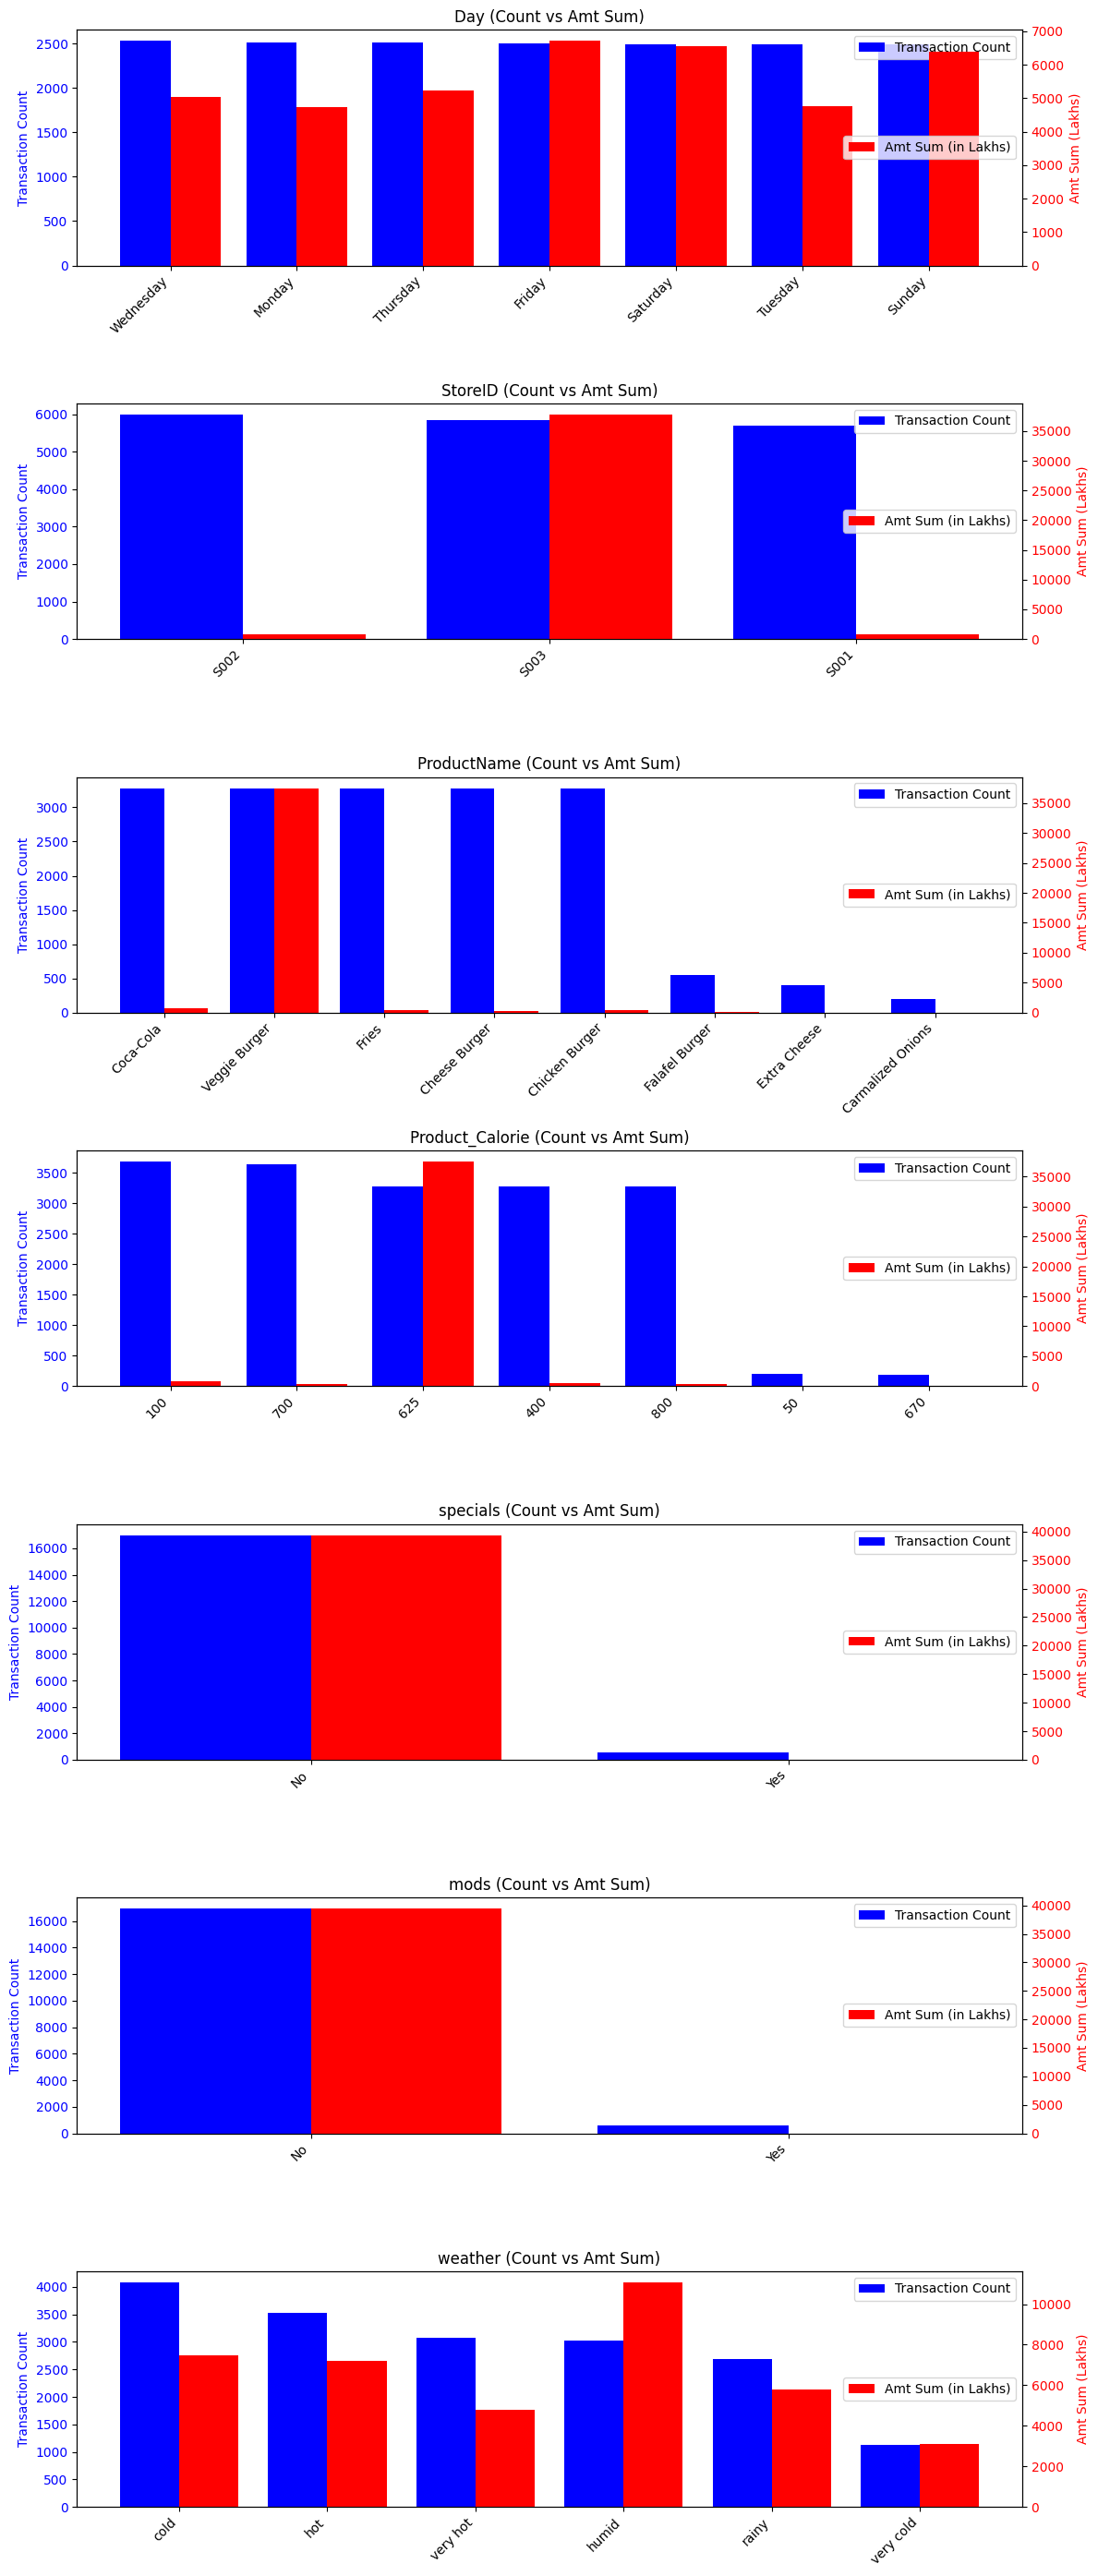

In [14]:
cols = ['Day', 'StoreID', 'ProductName', 'Product_Calorie', 'specials', 'mods', 'weather']
n = len(cols)

fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(12, n * 4))

for i, col in enumerate(cols):
    ax1 = axes[i]

    # Compute value counts and sum of Amt per category
    value_counts = df[col].value_counts()
    amt_sums = df.groupby(col)['Amt'].sum().reindex(value_counts.index)

    # Normalize Amt sum
    amt_sums_normalized = amt_sums / 100000

    categories = value_counts.index
    x = np.arange(len(categories))
    width = 0.4

    # Plot on two y-axes if the values differ significantly
    ax2 = ax1.twinx()

    # Bar plots
    bar1 = ax1.bar(x - width/2, value_counts.values, width, label='Transaction Count', color='blue')
    bar2 = ax2.bar(x + width/2, amt_sums_normalized.values, width, label='Amt Sum (in Lakhs)', color='red')

    # Titles and labels
    ax1.set_title(f'{col} (Count vs Amt Sum)', fontsize=12)
    ax1.set_ylabel('Transaction Count', color='blue')
    ax2.set_ylabel('Amt Sum (Lakhs)', color='red')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=45, ha='right')

    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')

    ax1.legend(loc='upper right')
    ax2.legend(loc='right')
    
plt.tight_layout()
plt.show()

In [15]:
df['ProductName'].value_counts()

ProductName
Coca-Cola            3280
Veggie Burger        3276
Fries                3275
Cheese Burger        3275
Chicken Burger       3274
Falafel Burger        546
Extra Cheese          400
Carmalized Onions     200
Name: count, dtype: int64

In [16]:
df.columns

Index(['Day_Count', 'Day', 'StoreID', 'ProductName', 'Product_Calorie',
       'specials', 'mods', 'weather', 'Inflation_Percentage',
       'Unemployment_Percentage', 'Amt'],
      dtype='object')

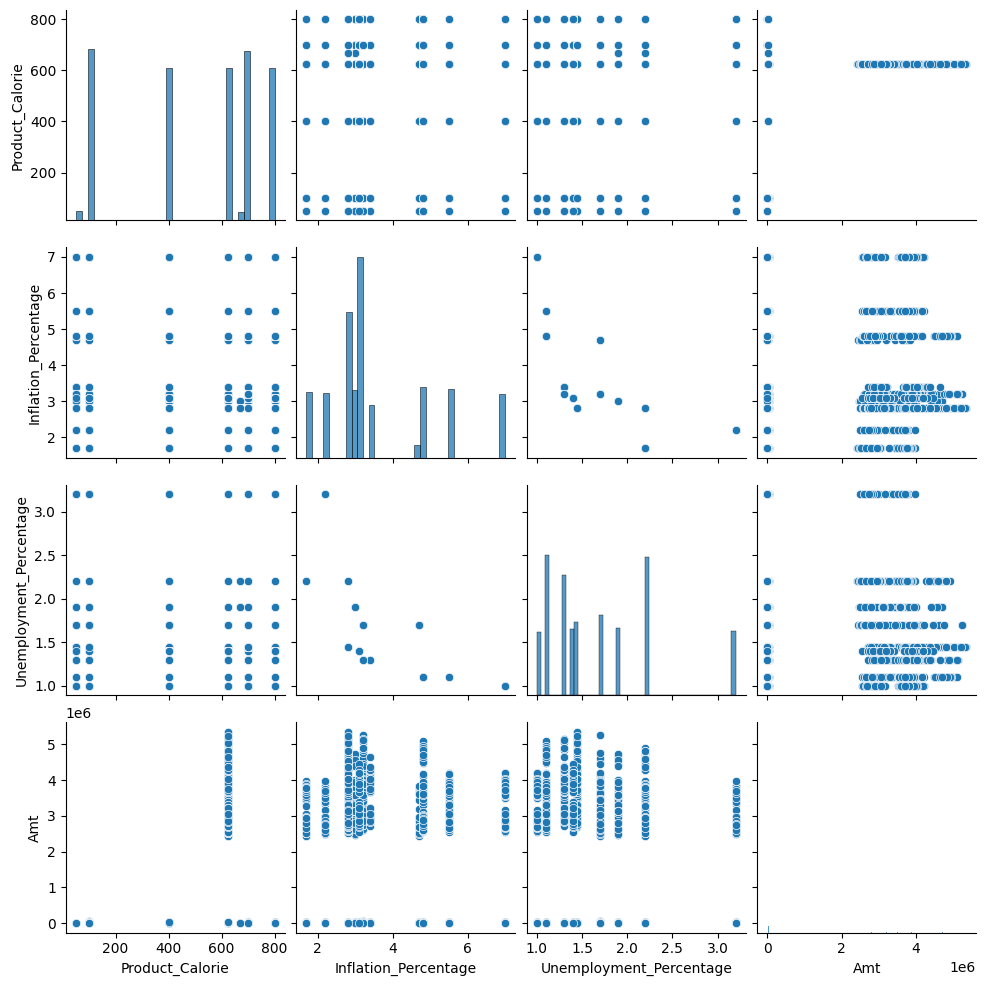

In [17]:
sns.pairplot(df[['Product_Calorie', 'Inflation_Percentage',
       'Unemployment_Percentage', 'Amt']])

<Axes: >

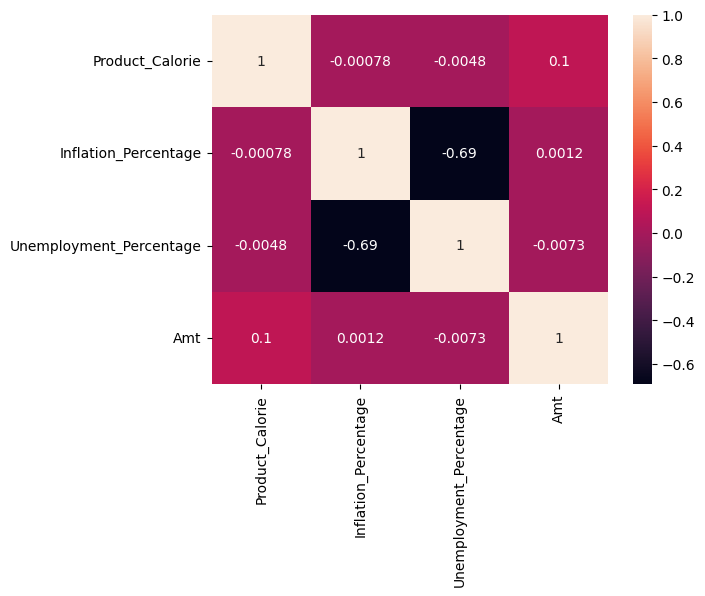

In [18]:
sns.heatmap(df[['Product_Calorie','Inflation_Percentage',
       'Unemployment_Percentage', 'Amt']].corr(), annot=True)

In [19]:
# let's keep the model simple, let's go with Day, Product Name and Weather only to predict Sales

In [20]:
final_df = df[['Day_Count','Day', 'ProductName', 'weather', 'Amt']]

In [21]:
final_df = pd.DataFrame(final_df.groupby(['weather', 'Day', 'ProductName'])['Amt'].sum()).reset_index()

In [22]:
le_ProductName = LabelEncoder()
final_df['OHE ProductName'] = le_ProductName.fit_transform(final_df['ProductName'])

le_Weather = LabelEncoder()
final_df['OHE weather'] = le_Weather.fit_transform(final_df['weather'])

le_Day = LabelEncoder()
final_df['OHE Day'] = le_Day.fit_transform(final_df['Day'])

In [23]:
final_df.groupby(['weather', 'Day', 'ProductName']).mean()

Amt  OHE ProductName  \
weather  Day       ProductName                                      
cold     Friday    Carmalized Onions         0.0              0.0   
                   Cheese Burger       1210900.0              1.0   
                   Chicken Burger      1532097.0              2.0   
                   Coca-Cola           2583898.0              3.0   
                   Extra Cheese              0.0              4.0   
...                                          ...              ...   
very hot Wednesday Coca-Cola           1455574.0              3.0   
                   Extra Cheese              0.0              4.0   
                   Falafel Burger       157140.0              5.0   
                   Fries                836812.5              6.0   
                   Veggie Burger      57876937.5              7.0   

                                      OHE weather  OHE Day  
weather  Day       ProductName                              
cold     Friday    Carmalized Onions          0.0      0.0  
                   Cheese Burger              0.0      0.0  
                   Chicken Burger             0.0      0.0  
                   Coca-Cola                  0.0      0.0  
                   Extra Cheese               0.0      0.0  
...                                           ...      ...  
very hot Wednesday Coca-Cola                  5.0      6.0  
                   Extra Cheese               5.0      6.0  
                   Falafel Burger             5.0      6.0  
                   Fries                      5.0      6.0  
                   Veggie Burger              5.0      6.0  

[334 rows x 4 columns]

In [24]:
X = final_df[['OHE ProductName', 'OHE weather','OHE Day']]
y = final_df['Amt']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
amt_scaler = StandardScaler()

In [27]:
y_train_scaled = amt_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = amt_scaler.fit(y_test.values.reshape(-1, 1))

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

In [29]:
class ModelSelection:
    def __init__(self, models, param_grids, X_train, X_test, y_train, y_test):
        self.models = models
        self.param_grids = param_grids
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.best_models = {}
        self.best_model = np.nan

    def train_all(self):
        min_rmse = np.inf
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            grid = GridSearchCV(model, self.param_grids.get(name, {}), cv=5, scoring='neg_root_mean_squared_error')
            grid.fit(self.X_train, self.y_train)

            y_pred = grid.predict(self.X_test)
            rmse = np.sqrt(mean_squared_error(self.y_test, y_pred, squared=False))

            if min_rmse >= rmse:
                self.best_model = grid
                min_rmse = rmse

            self.best_models[name] = {
                'best_estimator': grid.best_estimator_,
                'best_params': grid.best_params_,
                'rmse': rmse
            }

    def show_results(self):
        print("\nModel Results:")
        for name, result in self.best_models.items():
            print(f"Model: {name}")
            print(f"  Best Params: {result['best_params']}")
            print(f"  Test RMSE  : {result['rmse']:.4f}")

    def return_best_model(self):
        print(self.best_model)
        return self.best_model


In [30]:
models = {
    'GradientBoost':GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

param_grids = {
    'GradientBoost': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20]
    },
    'LinearRegression': {},  
    'Ridge': {
        'alpha': [0.01, 0.1, 1.0]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1.0]
    }
}

selector = ModelSelection(models, param_grids, X_train, X_test, y_train, y_test)
selector.train_all()
selector.show_results()

final_model = selector.return_best_model()



Training GradientBoost...

Training RandomForest...

Training DecisionTree...

Training LinearRegression...

Training Ridge...

Training Lasso...

Model Results:
Model: GradientBoost
  Best Params: {'max_depth': None, 'n_estimators': 200}
  Test RMSE  : 3149.1329
Model: RandomForest
  Best Params: {'max_depth': None, 'n_estimators': 200}
  Test RMSE  : 2798.2611
Model: DecisionTree
  Best Params: {'max_depth': None}
  Test RMSE  : 3149.1364
Model: LinearRegression
  Best Params: {}
  Test RMSE  : 4901.6549
Model: Ridge
  Best Params: {'alpha': 1.0}
  Test RMSE  : 4901.6034
Model: Lasso
  Best Params: {'alpha': 1.0}
  Test RMSE  : 4901.6549
GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')


In [34]:
label_encoders = {'weather':le_Weather, 'Day':le_Day, 'ProductName':le_ProductName}

In [52]:
final_df[(final_df['Day']=='Friday') & (final_df['ProductName']=='Carmalized Onions')].groupby(['weather', 'ProductName']).sum()

,,Day,Amt,OHE ProductName,OHE weather,OHE Day
weather,ProductName,,,,,
cold,Carmalized Onions,Friday,0.0,0,0,0
hot,Carmalized Onions,Friday,0.0,0,1,0
humid,Carmalized Onions,Friday,0.0,0,2,0
rainy,Carmalized Onions,Friday,0.0,0,3,0
very cold,Carmalized Onions,Friday,0.0,0,4,0
very hot,Carmalized Onions,Friday,0.0,0,5,0


In [35]:
for item in label_encoders:
    print(label_encoders[item].classes_)

['cold' 'hot' 'humid' 'rainy' 'very cold' 'very hot']
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
['Carmalized Onions' 'Cheese Burger' 'Chicken Burger' 'Coca-Cola'
 'Extra Cheese' 'Falafel Burger' 'Fries' 'Veggie Burger']


In [36]:
joblib.dump(final_model, filename='artifacts/RFModel.joblib')
joblib.dump(le_Weather, filename='artifacts/LE_Weather.joblib')
joblib.dump(le_Day, filename='artifacts/LE_Day.joblib')
joblib.dump(le_ProductName, filename='artifacts/LE_ProductName.joblib')
joblib.dump(amt_scaler, filename='artifacts/Amt_scaler.joblib')

['artifacts/Amt_scaler.joblib']

## Now over to Tkinter app